# Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

selecionando algumas colunas do dataset para análise

In [2]:
colunasSelecionadas = ['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

lendo o dataset

In [3]:
microdadosEnem = pd.read_csv('/home/david/analise-dados/projetos/ENEM/DADOS/MICRODADOS_ENEM_2019.csv', sep=';', encoding='ISO-8859-1', usecols=colunasSelecionadas)

visualizando os dados

In [6]:
microdadosEnem.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,190001595656,3552205,Sorocaba,35,SP,M,3,NaN,NaN,NaN,NaN,NaN
1,190001421546,2910800,Feira de Santana,29,BA,M,1,NaN,NaN,NaN,NaN,NaN
2,190001133210,2304400,Fortaleza,23,CE,F,3,NaN,NaN,NaN,NaN,NaN
3,190001199383,1721000,Palmas,17,TO,F,1,483.8,503.6,537.3,392.0,460.0
4,190001237802,3118601,Contagem,31,MG,F,1,513.6,575.5,570.7,677.0,860.0


quantidade de candidatos por estado

In [8]:
microdadosEnem['SG_UF_RESIDENCIA'].value_counts()

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

15 municipios com o maior número de candidatos

In [10]:
microdadosEnem['NO_MUNICIPIO_RESIDENCIA'].value_counts()[:15]

São Paulo         229837
Rio de Janeiro    137762
Brasília           94352
Fortaleza          93959
Salvador           88557
Manaus             85305
Belo Horizonte     79384
Belém              77105
São Luís           67545
Recife             54712
Goiânia            48234
Teresina           46814
Curitiba           44463
João Pessoa        37219
Maceió             34635
Name: NO_MUNICIPIO_RESIDENCIA, dtype: int64

histograma simples somente para visualizar a quantidade de candidatos por estados

<AxesSubplot:>

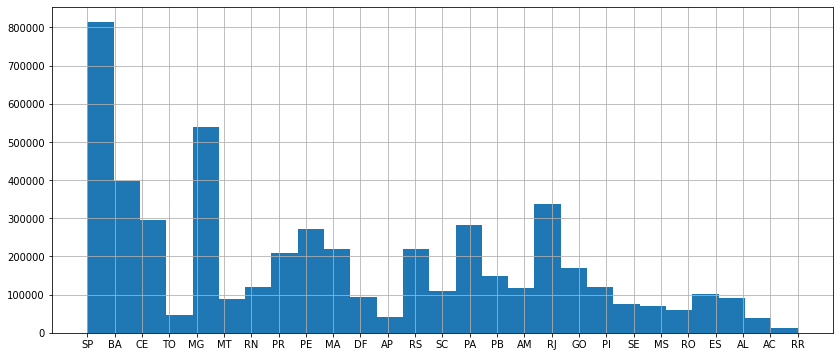

In [19]:
microdadosEnem['SG_UF_RESIDENCIA'].hist(bins=27, figsize=(14, 6))

quantidade de candidatos autodeclarados por cor/raça 

In [21]:
microdadosEnem['TP_COR_RACA'].value_counts()

3    2364063
1    1831779
2     648309
4     116162
0     103201
5      31756
Name: TP_COR_RACA, dtype: int64

gráfico para ver a distribuição por raça/cor

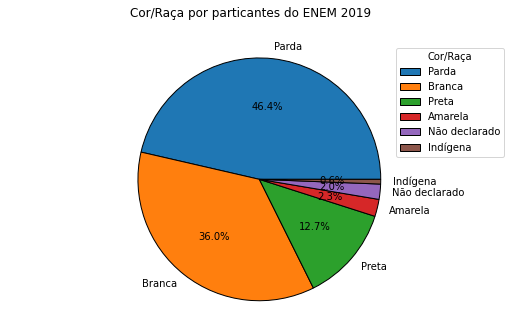

In [40]:
cor_raça = 'Parda', 'Branca', 'Preta', 'Amarela', 'Não declarado', 'Indígena'
quantidade = [2364063, 1831779, 648309, 116162, 103201, 31756]

plt.figure(figsize=(9, 5))
plt.pie(quantidade, labels=cor_raca, autopct='%1.1f%%', radius=5, wedgeprops={'edgecolor': 'black'})

plt.axis('equal')
plt.legend(title='Cor/Raça')
plt.suptitle('Cor/Raça por particantes do ENEM 2019')
plt.show()

# Índices socieconômicos

In [2]:
colunas = ['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [3]:
dadosEnem = pd.read_csv('/home/david/analise-dados/projetos/ENEM/DADOS/MICRODADOS_ENEM_2019.csv', sep=';', encoding='ISO-8859-1', usecols=colunas)

In [4]:
dadosEnem.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001595656,SP,NaN,NaN,NaN,NaN,NaN,B,B
1,190001421546,BA,NaN,NaN,NaN,NaN,NaN,C,E
2,190001133210,CE,NaN,NaN,NaN,NaN,NaN,E,E
3,190001199383,TO,483.8,503.6,537.3,392.0,460.0,C,E
4,190001237802,MG,513.6,575.5,570.7,677.0,860.0,E,E


excluindo dados nulos da análise

In [5]:
dadosEnem = dadosEnem.dropna()

In [6]:
q001eq002Dicionario = {'A': 'Nunca estudou',
                       'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
                       'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
                       'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
                       'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
                       'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
                       'G': 'Completou a Pós-graduação',
                       'H': 'Não sei'}

adicionando duas novas colunas que corresponde a legenda da coluna Q001 e Q002

In [7]:
dadosEnem['NO_Q001'] = [q001eq002Dicionario[resp] for resp in dadosEnem.Q001]

In [8]:
dadosEnem['NO_Q002'] = [q001eq002Dicionario[resp] for resp in dadosEnem.Q002]

In [9]:
dadosEnem.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
3,190001199383,TO,483.8,503.6,537.3,392.0,460.0,C,E,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ..."
4,190001237802,MG,513.6,575.5,570.7,677.0,860.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
5,190001782198,MT,563.7,644.9,564.2,675.3,800.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
6,190001421548,BA,484.6,488.4,507.2,594.7,600.0,E,B,"Completou o Ensino Médio, mas não completou a ...",Não completou a 4ª série/5º ano do Ensino Fund...
9,190001592266,SP,543.9,548.1,502.5,480.7,400.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


#1 - distribuição dos candidatos do ENEM 2019 pela escolaridade do pai

In [89]:
dadosEnem.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",1006255
Não completou a 4ª série/5º ano do Ensino Fundamental,752563
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",515785
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",433193
"Completou a Faculdade, mas não completou a Pós-graduação",308319
Não sei,306177
Completou a Pós-graduação,193529
Nunca estudou,186186


#2 - distribuição dos candidatos do ENEM 2019 pela escolaridade da mãe

In [90]:
dadosEnem.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",1234774
Não completou a 4ª série/5º ano do Ensino Fundamental,551516
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",475782
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",471827
"Completou a Faculdade, mas não completou a Pós-graduação",416291
Completou a Pós-graduação,333159
Nunca estudou,121022
Não sei,97636


média em ciências humanas pela escolaridade do pai

In [91]:
dadosEnem.filter(items=['NU_NOTA_CH', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_CH', ascending=False)

,NU_NOTA_CH
NO_Q001,
Completou a Pós-graduação,572.567769
"Completou a Faculdade, mas não completou a Pós-graduação",559.573207
"Completou o Ensino Médio, mas não completou a Faculdade",521.158465
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",504.568313
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",497.794227
Não sei,492.366318
Não completou a 4ª série/5º ano do Ensino Fundamental,486.211070
Nunca estudou,471.994413


média em ciências humanas pela escolaridade da mãe

In [92]:
dadosEnem.filter(items=['NU_NOTA_CH', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_CH', ascending=False)

,NU_NOTA_CH
NO_Q002,
Completou a Pós-graduação,556.856769
"Completou a Faculdade, mas não completou a Pós-graduação",547.873237
"Completou o Ensino Médio, mas não completou a Faculdade",513.777162
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",497.690775
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",492.424624
Não completou a 4ª série/5º ano do Ensino Fundamental,483.591484
Não sei,479.137304
Nunca estudou,471.007620


média na redação pela escolaridade do pai

In [93]:
dadosEnem.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação,700.475174
"Completou a Faculdade, mas não completou a Pós-graduação",673.474421
"Completou o Ensino Médio, mas não completou a Faculdade",604.810272
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",574.553882
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",558.370329
Não sei,537.062092
Não completou a 4ª série/5º ano do Ensino Fundamental,532.604420
Nunca estudou,496.082520


média na redação pela escolaridade da mãe

In [94]:
dadosEnem.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,676.237352
"Completou a Faculdade, mas não completou a Pós-graduação",655.624887
"Completou o Ensino Médio, mas não completou a Faculdade",591.134491
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",558.917193
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",543.685715
Não completou a 4ª série/5º ano do Ensino Fundamental,522.132595
Não sei,505.266910
Nunca estudou,482.743138


# Analisando os dados do questionário socieconômico do ENEM por estado

media na redação do estado do piauí pela escolaridade da mãe

In [95]:
dadosEnem.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
                    .where(microdadosEnem.SG_UF_RESIDENCIA == 'PI')\
                    .groupby('NO_Q002')\
                    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,685.566551
"Completou a Faculdade, mas não completou a Pós-graduação",656.666667
"Completou o Ensino Médio, mas não completou a Faculdade",595.181573
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",560.476647
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",536.294851
Não completou a 4ª série/5º ano do Ensino Fundamental,516.525105
Não sei,509.276566
Nunca estudou,485.597029


media na redação do estado do ceará pela escolaridade da mãe

In [96]:
dadosEnem.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
                    .where(microdadosEnem.SG_UF_RESIDENCIA == 'CE')\
                    .groupby('NO_Q002')\
                    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,708.197849
"Completou a Faculdade, mas não completou a Pós-graduação",684.128452
"Completou o Ensino Médio, mas não completou a Faculdade",617.722445
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",561.298307
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",538.930218
Não completou a 4ª série/5º ano do Ensino Fundamental,522.600910
Nunca estudou,488.849784
Não sei,472.449794


media na redação do estado do maranhão pela escolaridade da mãe

In [97]:
dadosEnem.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
                    .where(microdadosEnem.SG_UF_RESIDENCIA == 'MA')\
                    .groupby('NO_Q002')\
                    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,637.184577
"Completou a Faculdade, mas não completou a Pós-graduação",615.464825
"Completou o Ensino Médio, mas não completou a Faculdade",559.377909
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",526.112021
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",509.195933
Não completou a 4ª série/5º ano do Ensino Fundamental,496.653966
Não sei,485.382470
Nunca estudou,470.257219


Text(0.02, 0.73, 'A : Nunca estudou\nB : Não completou a 4ª série/5º ano do Ensino Fundamental\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio\nE : Completou o Ensino Médio, mas não completou a Faculdade\nF : Completou a Faculdade, mas não completou a Pós-graduação\nG : Completou a Pós-graduação\nH : Não sei\n')

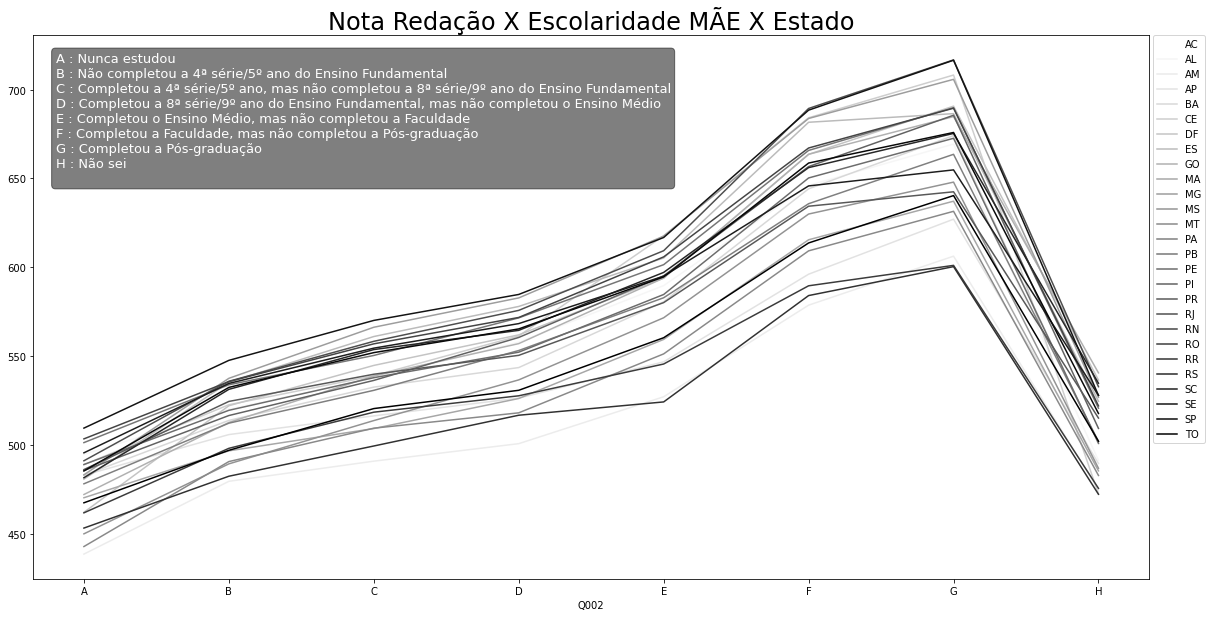

In [10]:
ax = dadosEnem.filter(items=['SG_UF_RESIDENCIA', 'NU_NOTA_REDACAO', 'Q002'])\
                    .groupby(['Q002', 'SG_UF_RESIDENCIA'])\
                    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                    .unstack().plot(figsize=(20, 10), colormap='binary')

ax.set_title('Nota Redação X Escolaridade MÃE X Estado', fontsize = 24)

handles, labels = ax.get_legend_handles_labels()

import re
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)

textdictQ002 = ''
for k, v in q001eq002Dicionario.items():
    textdictQ002 = textdictQ002 + f'{k} : {v}\n'
#print(textdictQ002)
ax.text(0.02,0.73, textdictQ002, transform=ax.transAxes, fontsize=13, color='white',
       bbox = {'boxstyle': 'round', 'facecolor': 'black', 'alpha': 0.5})

## exportando um novo dataframe para análise por município

In [20]:
mediaEnemPorMunicipio = microdadosEnem.groupby(['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA']).mean()

In [14]:
mediaEnemPorMunicipio.head()

,,,NU_INSCRICAO,CO_UF_RESIDENCIA,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,,,,,,,,
1100015,Alta Floresta D'Oeste,RO,1.900034e+11,11.0,2.492188,466.877454,493.412214,504.998473,503.000000,555.776081
1100023,Ariquemes,RO,1.900035e+11,11.0,2.335349,463.542845,489.960333,506.999802,498.971037,524.149147
1100031,Cabixi,RO,1.900037e+11,11.0,2.120482,454.453125,474.152239,486.223881,497.443750,492.835821
1100049,Cacoal,RO,1.900034e+11,11.0,2.369115,469.165657,494.664063,510.185132,510.684635,538.657074
1100056,Cerejeiras,RO,1.900035e+11,11.0,2.138211,468.381164,488.456536,507.604902,505.175685,552.222222


In [5]:
mediaEnemPorMunicipio = mediaEnemPorMunicipio.drop(columns=['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'TP_COR_RACA'])

In [23]:
mediaEnemPorMunicipio.head()

,,,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,,,,,
1100015,Alta Floresta D'Oeste,RO,466.877454,493.412214,504.998473,503.000000,555.776081
1100023,Ariquemes,RO,463.542845,489.960333,506.999802,498.971037,524.149147
1100031,Cabixi,RO,454.453125,474.152239,486.223881,497.443750,492.835821
1100049,Cacoal,RO,469.165657,494.664063,510.185132,510.684635,538.657074
1100056,Cerejeiras,RO,468.381164,488.456536,507.604902,505.175685,552.222222


In [24]:
mediaEnemPorMunicipio.to_csv('mediaEnemPorMunicipio.csv', encoding="utf-8", index=False)

aglutinação para realizar a análise

In [6]:
colunasAtlas = ['Codmun7', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']

In [7]:
atlasHumano = pd.read_csv('/home/david/analise-dados/projetos/dataset/atlas2013_dadosbrutos.csv', sep=',', usecols=colunasAtlas)

atlas de 1991

In [27]:
atlasHumano.head()

,Codmun7,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015,0.329,0.112,0.617,0.516
1,1100023,0.432,0.199,0.684,0.593
2,1100031,0.309,0.108,0.636,0.430
3,1100049,0.407,0.171,0.667,0.593
4,1100056,0.386,0.167,0.629,0.547


atlas de 2010 - o mais atual

In [8]:
atlasHumano2010 = atlasHumano[11130:]

In [29]:
atlasHumano2010.head()

,Codmun7,IDHM,IDHM_E,IDHM_L,IDHM_R
11130,1100015,0.641,0.526,0.763,0.657
11131,1100023,0.702,0.600,0.806,0.716
11132,1100031,0.650,0.559,0.757,0.650
11133,1100049,0.718,0.620,0.821,0.727
11134,1100056,0.692,0.602,0.799,0.688


In [9]:
dadosEnemIDHM = pd.merge(mediaEnemPorMunicipio, atlasHumano2010, how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'], right_on=['Codmun7'])

In [10]:
dadosEnemIDHM.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Codmun7,IDHM,IDHM_E,IDHM_L,IDHM_R
0,466.877454,493.412214,504.998473,503.000000,555.776081,1100015.0,0.641,0.526,0.763,0.657
1,463.542845,489.960333,506.999802,498.971037,524.149147,1100023.0,0.702,0.600,0.806,0.716
2,454.453125,474.152239,486.223881,497.443750,492.835821,1100031.0,0.650,0.559,0.757,0.650
3,469.165657,494.664063,510.185132,510.684635,538.657074,1100049.0,0.718,0.620,0.821,0.727
4,468.381164,488.456536,507.604902,505.175685,552.222222,1100056.0,0.692,0.602,0.799,0.688


<AxesSubplot:title={'center':'NOTA LINGUAGUENS'}, xlabel='NU_NOTA_LC', ylabel='IDHM'>

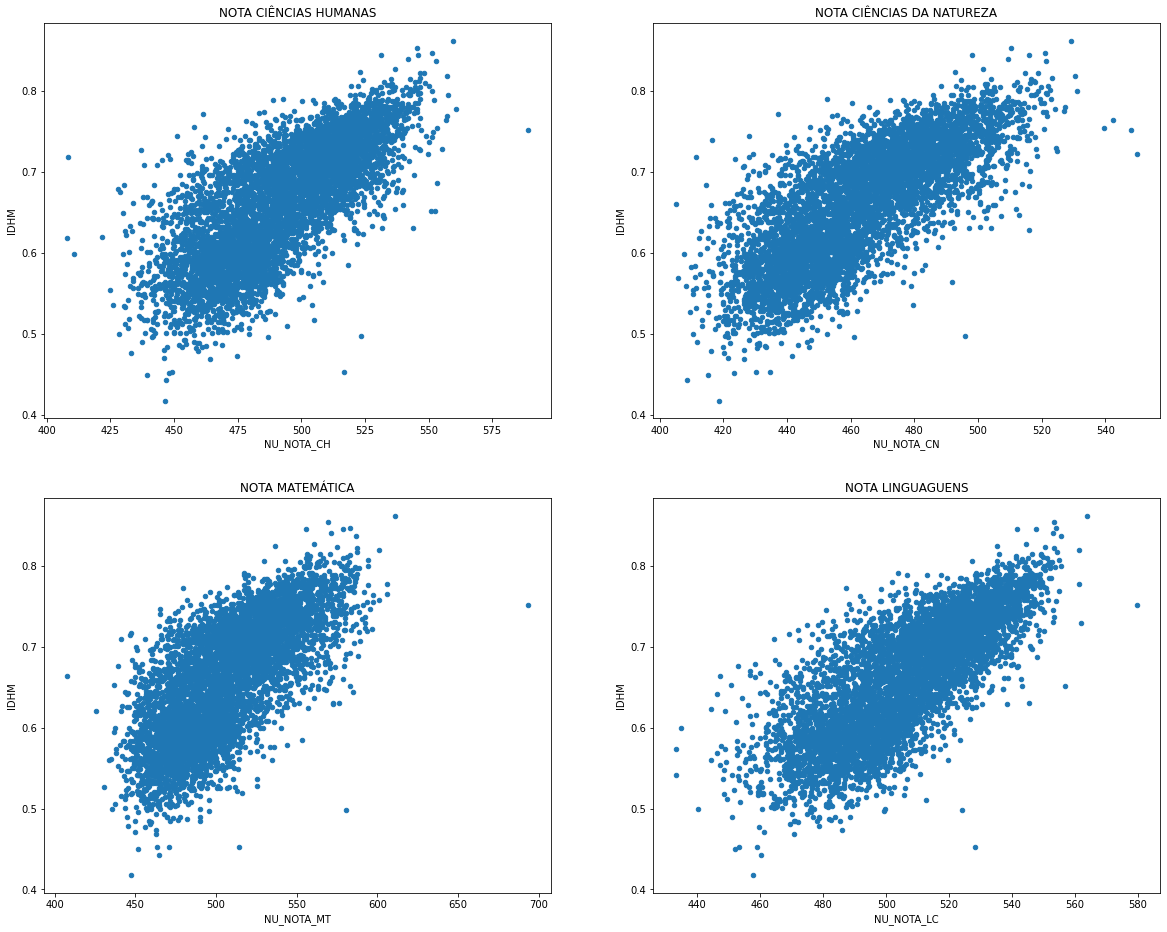

In [42]:
fix, ax = plt.subplots(2, 2, figsize=(20, 16))

dadosEnemIDHM.plot.scatter('NU_NOTA_CH', 'IDHM', title='NOTA CIÊNCIAS HUMANAS', ax=ax[0,0])

dadosEnemIDHM.plot.scatter('NU_NOTA_CN', 'IDHM', title='NOTA CIÊNCIAS DA NATUREZA', ax=ax[0,1])

dadosEnemIDHM.plot.scatter('NU_NOTA_MT', 'IDHM', title='NOTA MATEMÁTICA', ax=ax[1,0])

dadosEnemIDHM.plot.scatter('NU_NOTA_LC', 'IDHM', title='NOTA LINGUAGUENS', ax=ax[1,1])

<AxesSubplot:title={'center':'NOTA REDAÇÃO'}, xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

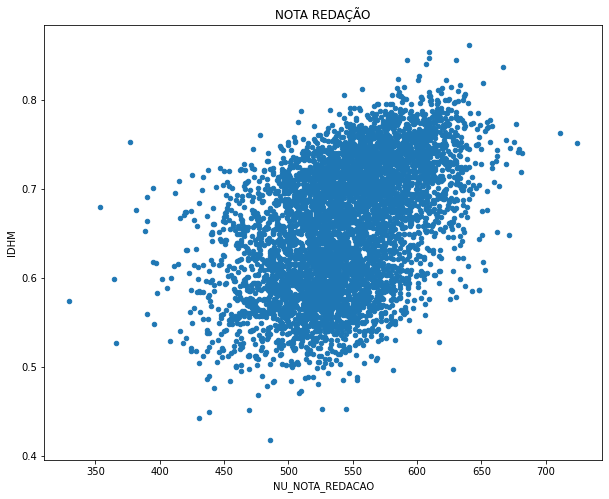

In [44]:
dadosEnemIDHM.plot.scatter('NU_NOTA_REDACAO', 'IDHM', title='NOTA REDAÇÃO', figsize=(10, 8))

#### lendo +1 dataset para realizar o gráfico de dispersão pelo mapa do brasil

In [11]:
municipios = pd.read_csv('/home/david/analise-dados/projetos/Municipios-Brasileiros/csv/municipios.csv')

In [12]:
municipios = municipios.drop(columns=['siafi_id', 'ddd', 'fuso_horario'])
municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


In [13]:
enem_idhm_municipios = pd.merge(dadosEnemIDHM, municipios, how='left', left_on=['Codmun7'], right_on=['codigo_ibge'])

In [15]:
enem_idhm_municipios = enem_idhm_municipios.drop(columns=['codigo_ibge', 'capital', 'codigo_uf'])

In [16]:
enem_idhm_municipios.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Codmun7,IDHM,IDHM_E,IDHM_L,IDHM_R,nome,latitude,longitude
0,466.877454,493.412214,504.998473,503.000000,555.776081,1100015.0,0.641,0.526,0.763,0.657,Alta Floresta D'Oeste,-11.92830,-61.9953
1,463.542845,489.960333,506.999802,498.971037,524.149147,1100023.0,0.702,0.600,0.806,0.716,Ariquemes,-9.90571,-63.0325
2,454.453125,474.152239,486.223881,497.443750,492.835821,1100031.0,0.650,0.559,0.757,0.650,Cabixi,-13.49450,-60.5520
3,469.165657,494.664063,510.185132,510.684635,538.657074,1100049.0,0.718,0.620,0.821,0.727,Cacoal,-11.43430,-61.4562
4,468.381164,488.456536,507.604902,505.175685,552.222222,1100056.0,0.692,0.602,0.799,0.688,Cerejeiras,-13.18700,-60.8168


In [17]:
enem_idhm_municipios = enem_idhm_municipios.reindex(columns=['nome', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Codmun7', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R', 'latitude', 'longitude'])

In [18]:
enem_idhm_municipios.head()

,nome,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Codmun7,IDHM,IDHM_E,IDHM_L,IDHM_R,latitude,longitude
0,Alta Floresta D'Oeste,466.877454,493.412214,504.998473,503.000000,555.776081,1100015.0,0.641,0.526,0.763,0.657,-11.92830,-61.9953
1,Ariquemes,463.542845,489.960333,506.999802,498.971037,524.149147,1100023.0,0.702,0.600,0.806,0.716,-9.90571,-63.0325
2,Cabixi,454.453125,474.152239,486.223881,497.443750,492.835821,1100031.0,0.650,0.559,0.757,0.650,-13.49450,-60.5520
3,Cacoal,469.165657,494.664063,510.185132,510.684635,538.657074,1100049.0,0.718,0.620,0.821,0.727,-11.43430,-61.4562
4,Cerejeiras,468.381164,488.456536,507.604902,505.175685,552.222222,1100056.0,0.692,0.602,0.799,0.688,-13.18700,-60.8168


In [19]:
enem_idhm_municipios.to_csv('enem_idhm_municipios.csv', encoding="utf-8", index=False)

mapa da localização dos municípios e sua média em redação

<AxesSubplot:title={'center':'NU_NOTA_REDACAO'}, xlabel='longitude', ylabel='latitude'>

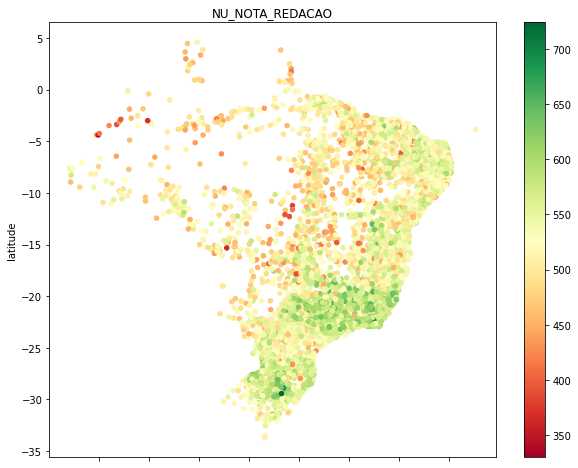

In [183]:
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_REDACAO'], cmap='RdYlGn', figsize=(10,8), title='NU_NOTA_REDACAO')

mapa da localização dos municípios e sua média em ciências humanas, ciências da natureza, linguagens e matemática respectivamente.

<AxesSubplot:title={'center':'NU_NOTA_MT'}, xlabel='longitude', ylabel='latitude'>

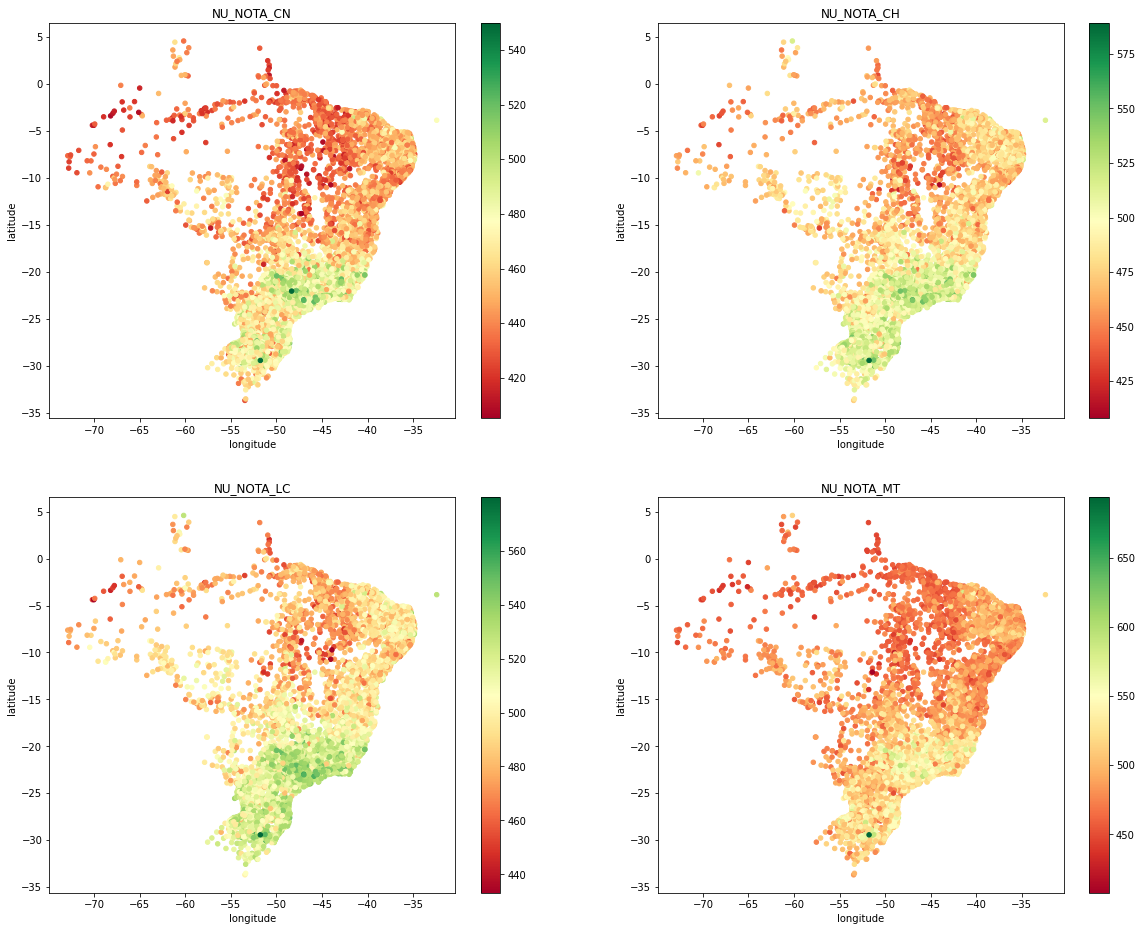

In [184]:
fix, ax = plt.subplots(2,2, figsize=(20, 16))

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_CN'], cmap='RdYlGn', title='NU_NOTA_CN', ax=ax[0,0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_CH'], cmap='RdYlGn', title='NU_NOTA_CH', ax=ax[0,1])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_LC'], cmap='RdYlGn', title='NU_NOTA_LC', ax=ax[1,0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_MT'], cmap='RdYlGn', title='NU_NOTA_MT', ax=ax[1,1])

mapa do IDHM, IDHM Educação, IDHM Renda e IDHM Longevidade por município.

<AxesSubplot:title={'center':'IDHM_L'}, xlabel='longitude', ylabel='latitude'>

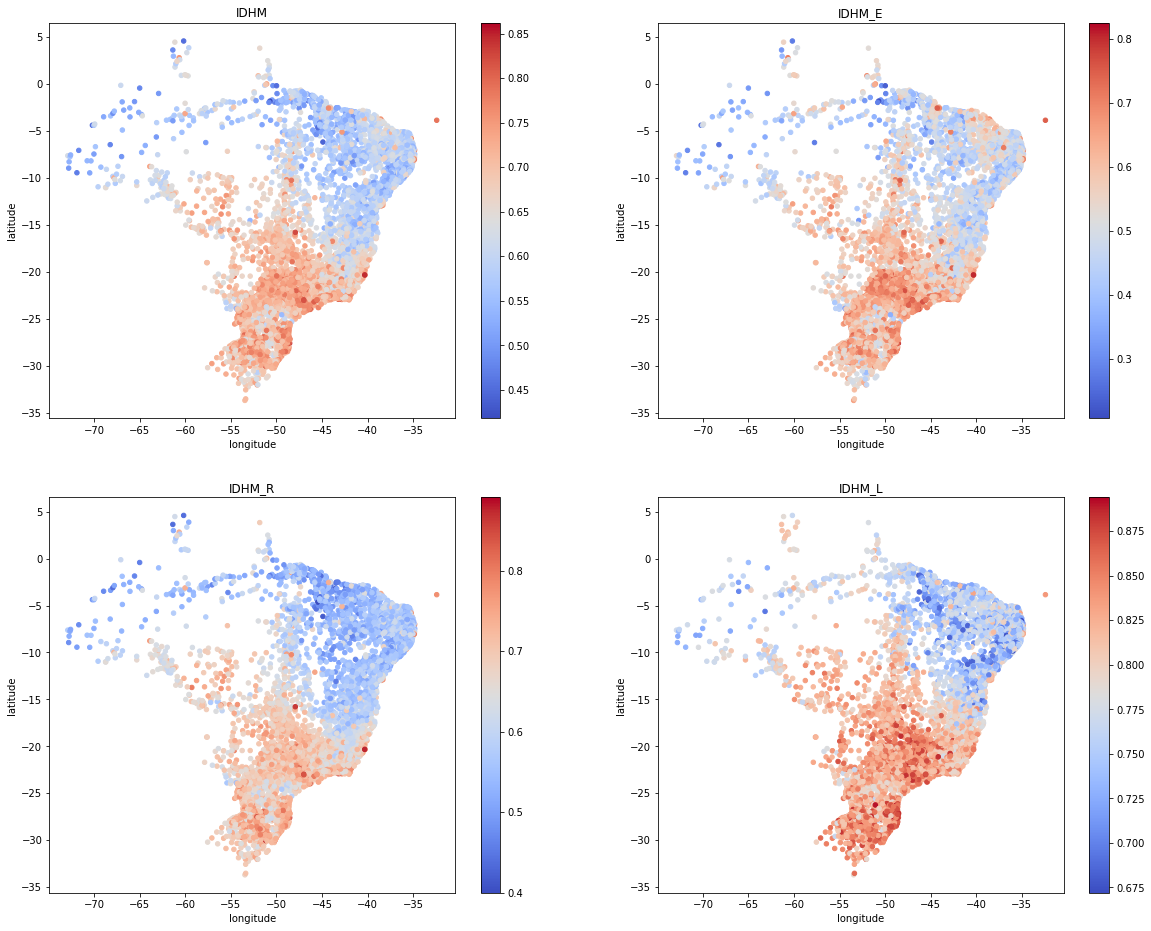

In [185]:
fix, ax = plt.subplots(2,2, figsize=(20, 16))

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['IDHM'], cmap='coolwarm', title='IDHM', ax=ax[0,0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['IDHM_E'], cmap='coolwarm', title='IDHM_E', ax=ax[0,1])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['IDHM_R'], cmap='coolwarm', title='IDHM_R', ax=ax[1,0])

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['IDHM_L'], cmap='coolwarm', title='IDHM_L', ax=ax[1,1])